# Übung 3a
### Convolutional Neural Network MNIST Dataset

In [80]:
import tensorflow as tf
from tensorflow import keras

In [81]:
print("Tensorflow-Version:", tf.__version__)
print("Keras-Version:", keras.__version__)

Tensorflow-Version: 2.1.0
Keras-Version: 2.2.4-tf


In [82]:
# Laden des Datensatzes
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [83]:
# Train Test Split
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train_full.shape, y_train_full.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


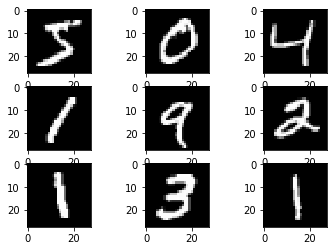

In [84]:
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X_train_full[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [85]:
classes = [0,1,2,3,4,5,6,7,8,9]

### Beispielzahlen plotten

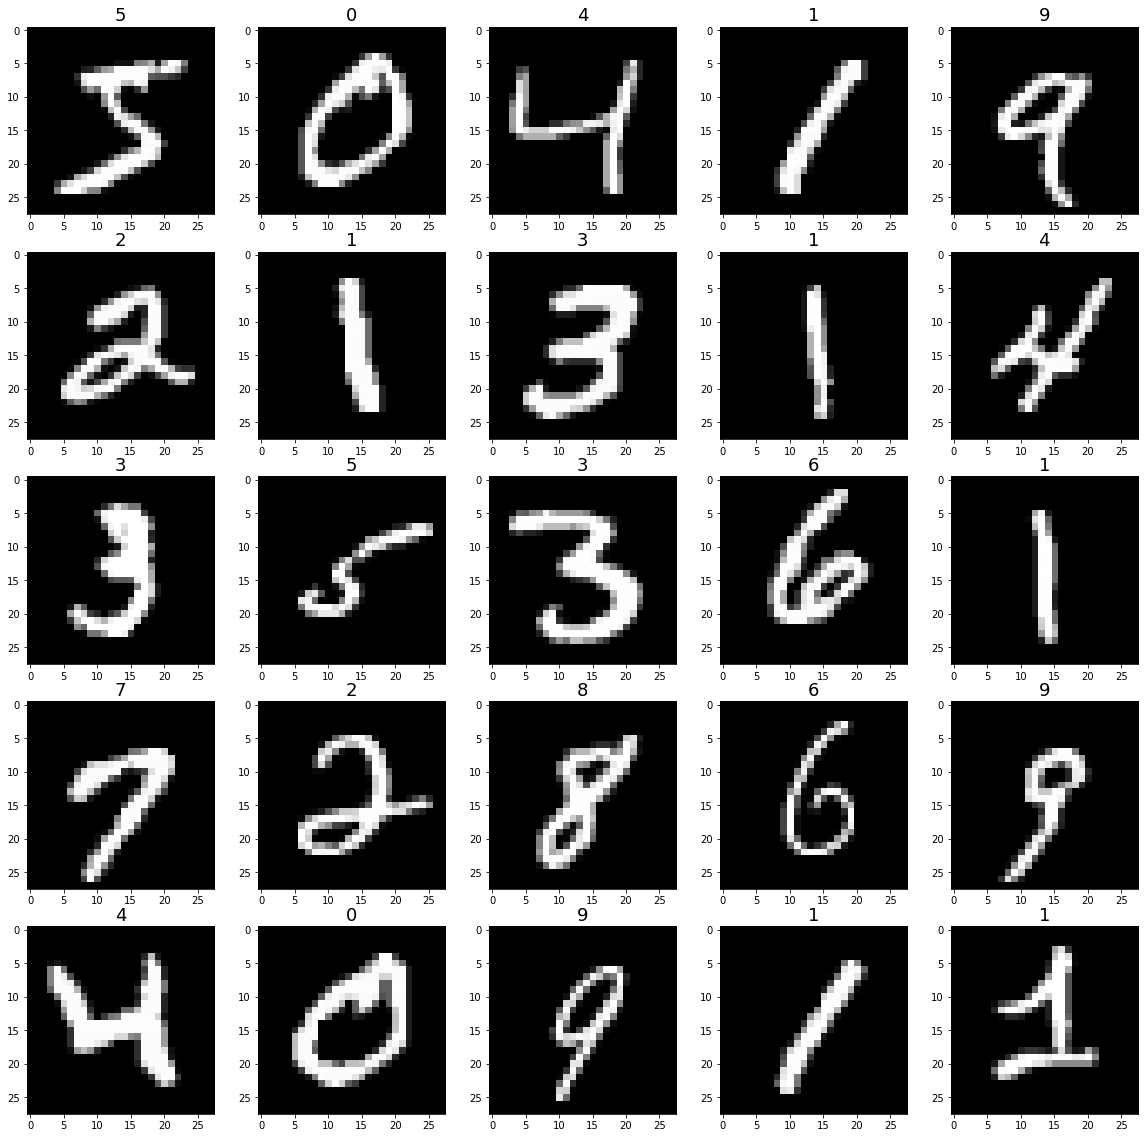

In [86]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(ax.flatten()):
    ax.set_title(classes[y_train_full[i]], fontdict={'fontsize':18})
    ax.imshow(X_train_full[i], cmap='gray')

In [87]:
X_valid, X_train, X_test = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0, X_test / 255.0
y_valid, y_train, y_test = y_train_full[:5000], y_train_full[5000:], y_test

In [88]:
X_valid.shape

(5000, 28, 28)

In [89]:
y_valid.shape

(5000,)

## CNN erstellen
Ds CNN besteht aus 2 zweidimensionalen Convolutional Layern mit einer Size von 3x3 Pixel und der Aktivierungsfunktion ReLU. Darauf folgt ein zweidimensionaler Max Pooling Layer mit Pool Size 2x2. Danach ein Dropout Layer mit Rate 0,25 und dann ein Flatten Layer. Nach dem Flatten Layer kommt noch eine Dense Layer mit der ReLu Aktivierung und dann ein weiterer Dropout Layer mit Rate 0,5. Als Output Layer verwenden wir eine Softmax Aktivierungsfunktion, damit ich Wahrscheinlichkeiten für die 10 möglichen Zahlen erhalten.
Als Optimierungsfunktion verwende ich den SGD und als Loss Funktion die Sparse Categorical Entropy.

In [90]:
def define_model(input_shape = [28, 28, 1]):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    # compile model
    opt      = keras.optimizers.SGD(lr=0.01, momentum=0.9)
    loss_fct = keras.losses.sparse_categorical_crossentropy
    metrics  = [keras.metrics.sparse_categorical_accuracy]
    model.compile(optimizer=opt, loss=loss_fct, metrics=metrics)
    return model

In [91]:
cnn_model = define_model()

In [92]:
# Summary ausgeben
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [93]:
bs = 32
# Daten in Tensorflow Dataset umwandeln
cnn_train_ds = tf.data.Dataset.from_tensor_slices((X_train.reshape(X_train.shape[0], 28, 28, 1), y_train)).batch(bs)
cnn_valid_ds = tf.data.Dataset.from_tensor_slices((X_valid.reshape(X_valid.shape[0], 28, 28, 1), y_valid)).batch(bs)
cnn_test_ds  = tf.data.Dataset.from_tensor_slices((X_test.reshape(X_test.shape[0], 28, 28, 1),  y_test)).batch(bs)

In [94]:
cnn_train_hist_1 = cnn_model.fit(cnn_train_ds, validation_data=cnn_valid_ds, epochs=10)
cnn_test_hist_1  = cnn_model.evaluate(cnn_test_ds)

Train for 1719 steps, validate for 157 steps
Epoch 1/10
1719/1719 [==============================] - 106s 62ms/step - loss: 0.3042 - sparse_categorical_accuracy: 0.9053 - val_loss: 0.0853 - val_sparse_categorical_accuracy: 0.9748
Epoch 2/10
1719/1719 [==============================] - 105s 61ms/step - loss: 0.1051 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.0563 - val_sparse_categorical_accuracy: 0.9830
Epoch 3/10
1719/1719 [==============================] - 545s 317ms/step - loss: 0.0792 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.0509 - val_sparse_categorical_accuracy: 0.9840
Epoch 4/10
1719/1719 [==============================] - 106s 62ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9804 - val_loss: 0.0500 - val_sparse_categorical_accuracy: 0.9828
Epoch 5/10
1719/1719 [==============================] - 1162s 676ms/step - loss: 0.0562 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.0449 - val_sparse_categorical_accuracy: 0.9864
Epoch 6/10
1719/1719 [=====

In [101]:
cnn_training_1 = cnn_model.evaluate(cnn_test_ds)

313/313 [==============================] - 4s 12ms/step - loss: 0.0343 - sparse_categorical_accuracy: 0.9892


In [102]:
print("Test loss:\t", cnn_training_1[0])
print("Test accuracy:\t", cnn_training_1[1])

Test loss:	 0.03431688113771467
Test accuracy:	 0.9892


In [100]:
def plot_training_curves(train_hists, test_hists, metric="sparse_categorical_accuracy"):
    """
    Helper function for plotting training curves from tf-keras history objects
    """ 
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    train_hist_loss     = sum([x.history['loss']     for x in train_hists], [])
    train_hist_val_loss = sum([x.history['val_loss'] for x in train_hists], [])
    ax[0].plot(train_hist_loss)
    ax[0].plot(train_hist_val_loss)
    for x in test_hists:
        ax[0].axhline(y=x[0], color="green", ls="--")
    ax[0].set_title('Loss history')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation', 'Test'], loc='upper right')
    
    train_hist_acc     = sum([x.history[metric]          for x in train_hists], [])
    train_hist_val_acc = sum([x.history['val_' + metric] for x in train_hists], [])
    ax[1].plot(train_hist_acc)
    ax[1].plot(train_hist_val_acc)
    for x in test_hists:
        ax[1].axhline(y=x[1], color="green", ls="--")
    ax[1].set_title('Accuracy history')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation', 'Test'], loc='lower right')
    

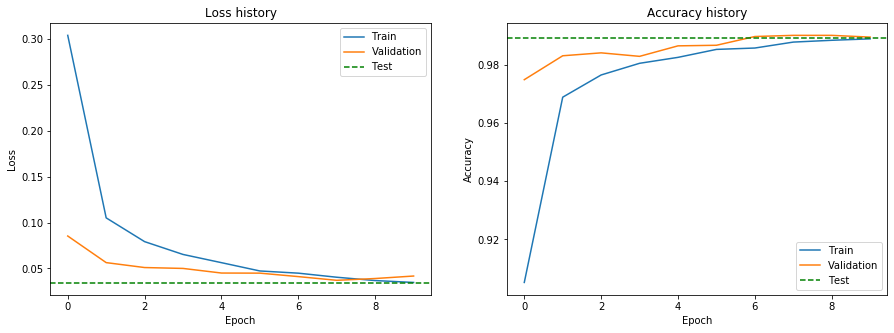

In [103]:
plot_training_curves([cnn_train_hist_1], [cnn_test_hist_1])

Das Ergebnis aus dem CNN ist sehr gut mit knapp 99 % und auch die Grafik zeigt, dass wir noch nicht overfitten mit dem CNN.

In [104]:
def plot_confusion_matrix(cm, title='', cmap=plt.cm.Blues, labels=None, fontsize=15, figsize=(15,15)):
    """
    Helper function for plotting a confusion matrix
    """ 
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    fig.colorbar(cax)
    if labels:
        ax.set_xticklabels([''] + labels, fontdict={'fontsize': fontsize})
        ax.set_yticklabels([''] + labels, fontdict={'fontsize': fontsize})
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xlabel('Predicted', fontdict={'fontsize': fontsize})
    plt.ylabel('True', fontdict={'fontsize': fontsize})
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[0]):
            c = cm[j,i]
            ax.text(i, j, str(c), va='center', ha='center', fontdict={'fontsize': fontsize}, color="white")
    
    plt.show()

In [109]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.ticker as ticker

In [110]:
Y_pred = cnn_model.predict(cnn_test_ds) 
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

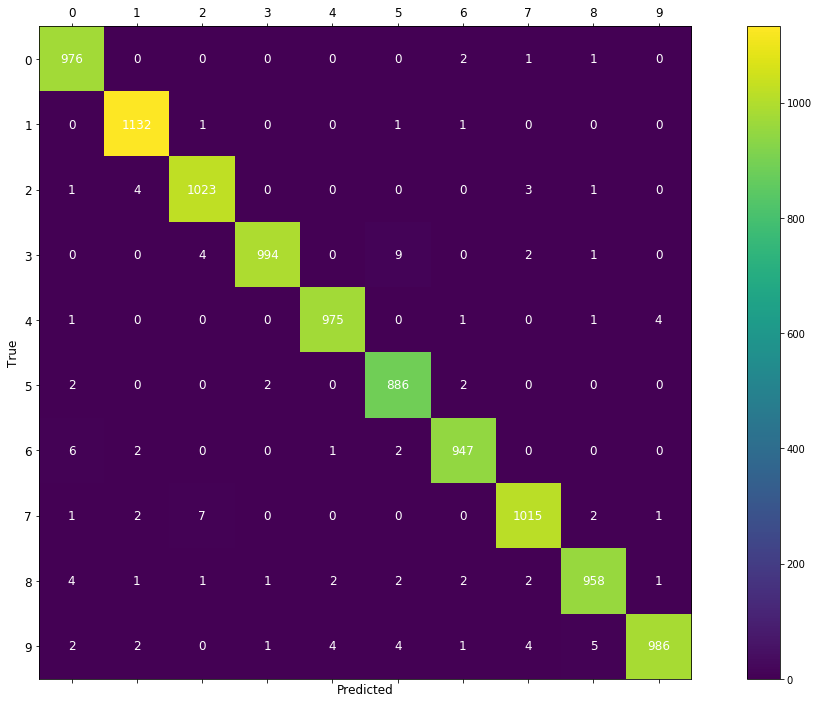

In [111]:
plot_confusion_matrix(cm, labels = classes, figsize=(20,12), fontsize=12)